# Heart Attack Prediction in United State
Kaggle dataset: https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-united-states

## Data cleaning and EDA

In [4]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv("heart_attack_dataset.csv")
df.head()

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome
0,31,Male,194,162,71,22.9,0,1,0,0,...,Yes,Downsloping,1,Normal,0,0,Suburban,Retired,Single,No Heart Attack
1,69,Male,208,148,93,33.9,1,1,0,0,...,Yes,Upsloping,2,Normal,0,0,Suburban,Unemployed,Married,No Heart Attack
2,34,Female,132,161,94,34.0,0,0,1,1,...,Yes,Upsloping,0,Normal,1,0,Rural,Retired,Single,Heart Attack
3,53,Male,268,134,91,35.0,0,1,1,0,...,Yes,Flat,0,Reversible defect,1,0,Suburban,Retired,Widowed,No Heart Attack
4,57,Female,203,140,75,30.1,0,1,0,0,...,Yes,Flat,0,Fixed defect,1,0,Rural,Retired,Married,Heart Attack


In [8]:
#Handling Missing Values
df.isnull().sum()

Age                      0
Gender                   0
Cholesterol              0
BloodPressure            0
HeartRate                0
BMI                      0
Smoker                   0
Diabetes                 0
Hypertension             0
FamilyHistory            0
PhysicalActivity         0
AlcoholConsumption       0
Diet                     0
StressLevel              0
Ethnicity                0
Income                   0
EducationLevel           0
Medication               0
ChestPainType            0
ECGResults               0
MaxHeartRate             0
ST_Depression            0
ExerciseInducedAngina    0
Slope                    0
NumberOfMajorVessels     0
Thalassemia              0
PreviousHeartAttack      0
StrokeHistory            0
Residence                0
EmploymentStatus         0
MaritalStatus            0
Outcome                  0
dtype: int64

In [10]:
#Here we will look for any duplicates
df.duplicated().sum()

0

No dubplicates on the dataset.

In [14]:
#Veryfing the data types
df.dtypes

Age                        int64
Gender                    object
Cholesterol                int64
BloodPressure              int64
HeartRate                  int64
BMI                      float64
Smoker                     int64
Diabetes                   int64
Hypertension               int64
FamilyHistory              int64
PhysicalActivity           int64
AlcoholConsumption         int64
Diet                      object
StressLevel                int64
Ethnicity                 object
Income                     int64
EducationLevel            object
Medication                object
ChestPainType             object
ECGResults                object
MaxHeartRate               int64
ST_Depression            float64
ExerciseInducedAngina     object
Slope                     object
NumberOfMajorVessels       int64
Thalassemia               object
PreviousHeartAttack        int64
StrokeHistory              int64
Residence                 object
EmploymentStatus          object
MaritalSta

All columns are on the correct data-type. Yet, some columns(e.g.,Gender, StrokeHistory, PreviousHeartAttack, etc) can still be get grouped under a 'category' data type.

In [21]:
#We will convert some of the object data type columns in to a category data type columns
categorics_cols = ["Gender", "Smoker", "Diabetes", "Hypertension", "FamilyHistory", "PhysicalActivity", "AlcoholConsumption", "Diet", "StressLevel", 
                   "Ethnicity", "Income", "EducationLevel", "Medication", "ChestPainType","ECGResults", "ExerciseInducedAngina", "Slope", 
                   "Thalassemia", "PreviousHeartAttack", "StrokeHistory", "Residence", "EmploymentStatus", "MaritalStatus"] 

df[categorics_cols] = df[categorics_cols].astype("category")#changing the object data type columns into categorical columns
df[categorics_cols].dtypes

Gender                   category
Smoker                   category
Diabetes                 category
Hypertension             category
FamilyHistory            category
PhysicalActivity         category
AlcoholConsumption       category
Diet                     category
StressLevel              category
Ethnicity                category
Income                   category
EducationLevel           category
Medication               category
ChestPainType            category
ECGResults               category
ExerciseInducedAngina    category
Slope                    category
Thalassemia              category
PreviousHeartAttack      category
StrokeHistory            category
Residence                category
EmploymentStatus         category
MaritalStatus            category
dtype: object

In [23]:
#Ensure that all the numerical columns are type int64 or float64
numerical_cols = ["Age", "Cholesterol", "BloodPressure", "HeartRate", "BMI", "MaxHeartRate", "ST_Depression", "NumberOfMajorVessels"]
df[numerical_cols].dtypes

Age                       int64
Cholesterol               int64
BloodPressure             int64
HeartRate                 int64
BMI                     float64
MaxHeartRate              int64
ST_Depression           float64
NumberOfMajorVessels      int64
dtype: object

In [25]:
#Ensure that no value is stored as string accidentally
all_numeric = all(df[col].astype(str).str.isnumeric().all() for col in numerical_cols)
all_numeric

False

Getting a False indicates that we at least have one value in "all_numeric" that is not pure numeric string.

In [28]:
#We will troubleshoot and find the values which are causing the problem
for col in numerical_cols:
    if not df[col].astype(str).str.isnumeric().all():#Checkin if the values are numeric
        print(f"Column '{col}' has non-numeric values:", df[col].astype(str)[~df[col].astype(str).str.isnumeric()].unique())
        

Column 'BMI' has non-numeric values: ['22.9' '33.9' '34.0' '35.0' '30.1' '38.7' '21.7' '23.1' '24.8' '24.7'
 '31.7' '29.8' '20.1' '20.3' '34.6' '24.6' '19.6' '22.1' '30.0' '33.8'
 '19.1' '28.0' '23.8' '32.0' '39.8' '27.1' '27.3' '35.2' '24.9' '25.8'
 '28.9' '36.5' '22.7' '25.1' '29.6' '28.4' '29.0' '26.4' '30.9' '23.6'
 '23.5' '19.4' '27.6' '33.0' '33.7' '22.2' '18.1' '28.6' '34.8' '34.4'
 '31.6' '35.8' '32.6' '28.7' '27.8' '30.2' '22.8' '23.2' '21.2' '38.0'
 '39.9' '33.3' '31.5' '21.4' '39.5' '28.5' '38.6' '31.0' '38.2' '39.7'
 '20.6' '39.0' '19.9' '29.3' '22.0' '38.1' '26.5' '20.7' '33.5' '39.3'
 '30.4' '25.9' '22.4' '19.8' '23.7' '35.9' '27.2' '28.8' '34.3' '25.4'
 '31.3' '25.2' '30.3' '20.5' '18.8' '31.4' '28.1' '19.5' '32.7' '30.7'
 '37.3' '36.8' '26.3' '34.5' '26.1' '39.2' '28.3' '25.6' '32.1' '38.4'
 '39.6' '25.5' '26.2' '37.9' '19.0' '21.5' '21.3' '36.3' '35.5' '31.2'
 '37.8' '24.5' '18.2' '29.2' '22.6' '29.1' '35.4' '32.4' '29.5' '37.7'
 '22.5' '27.4' '30.6' '18.4' '35.6' '37.

The output shows that the two columns BMI and ST_Depression have values which are not numeric. str.isnumeric() only accepts whole numbers without decimal point. However, these values are valid floating-point numbers, not non-numeric data.

In [31]:
#converts the columns (BMI and ST_Depression) to float64
df["BMI"] = pd.to_numeric(df["BMI"], errors='coerce')
df["ST_Depression"] = pd.to_numeric(df["ST_Depression"], errors='coerce')

df["BMI"].dtypes, df["ST_Depression"].dtypes

(dtype('float64'), dtype('float64'))

In [35]:
#Handle NaN Values
df["BMI"] = df["BMI"].fillna(df["BMI"].mean()).infer_objects(copy=False)
df["ST_Depression"] = df["ST_Depression"].fillna(df["ST_Depression"].mean()).infer_objects(copy=False)

len(df["BMI"].isna()), len(df["ST_Depression"].isna())

(372974, 372974)

This indicats that our two columns BMI and ST_Depression has no missing values

### Detect and Treat Outliers

In [39]:
#Calculating IQR for numerical type columns
#We will define a column that caluculate the IQR for us

def calculate_iqr_bounds(df, columns):
     results = {}
     for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        results[col] = {
            f"{col}: Lower bound = {lower_bound:.2f}. Values below this may be outliers.",
            f"{col}: Upper bound = {upper_bound:.2f}. Values above this may be outliers."
        }
     return results

In [41]:
calculate_iqr_bounds(df, 
['Age',
 'Cholesterol',
 'BloodPressure',
 'HeartRate',
 'BMI',
 'MaxHeartRate',
 'ST_Depression',
 'NumberOfMajorVessels'])

{'Age': {'Age: Lower bound = 1.00. Values below this may be outliers.',
  'Age: Upper bound = 113.00. Values above this may be outliers.'},
 'Cholesterol': {'Cholesterol: Lower bound = -1.00. Values below this may be outliers.',
  'Cholesterol: Upper bound = 399.00. Values above this may be outliers.'},
 'BloodPressure': {'BloodPressure: Lower bound = 44.50. Values below this may be outliers.',
  'BloodPressure: Upper bound = 224.50. Values above this may be outliers.'},
 'HeartRate': {'HeartRate: Lower bound = 27.50. Values below this may be outliers.',
  'HeartRate: Upper bound = 151.50. Values above this may be outliers.'},
 'BMI': {'BMI: Lower bound = 7.00. Values below this may be outliers.',
  'BMI: Upper bound = 51.00. Values above this may be outliers.'},
 'MaxHeartRate': {'MaxHeartRate: Lower bound = 49.00. Values below this may be outliers.',
  'MaxHeartRate: Upper bound = 249.00. Values above this may be outliers.'},
 'ST_Depression': {'ST_Depression: Lower bound = -2.50. Va

Using the function we created(the "calculate_iqr_bounds(df,columns)" function) we managed to find the upper and lower bounds for each numerical column

The next step is Treat the Outliers and when performing this steps you get to choose between three options.
1. Cap values: Replacing outliers with bound values
2. Remove: Droping the outlier rows
3. Keep: If outliers are valid based on our dataset we will choose to CapValues

Text(0.5, 1.0, 'Boxplot of Numerical Features')

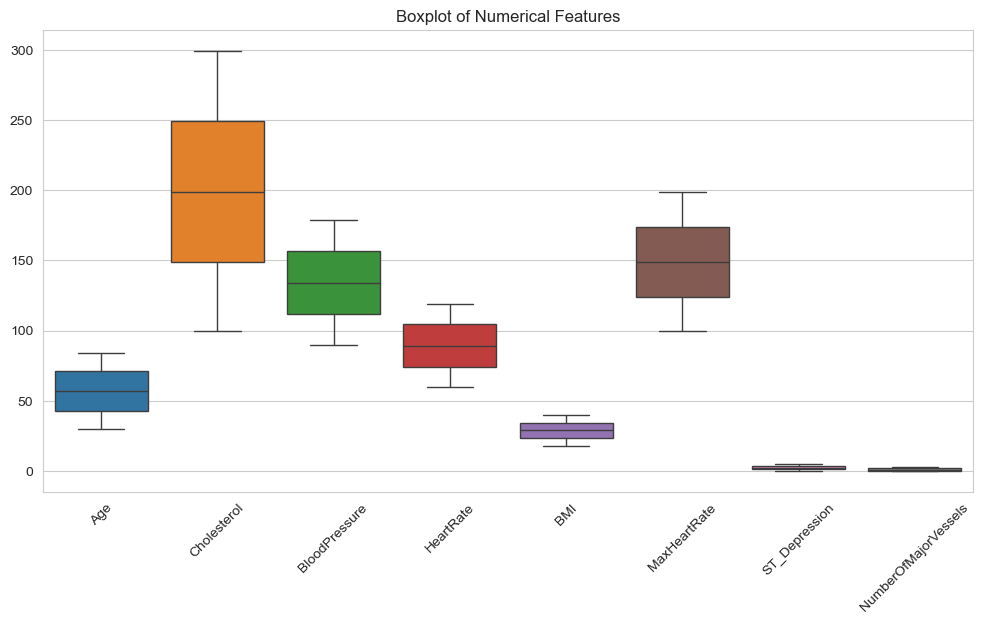

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting a boxplot

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))

sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")

Text(0.5, 1.0, 'ST_Depression and NumberOfMajorVessels')

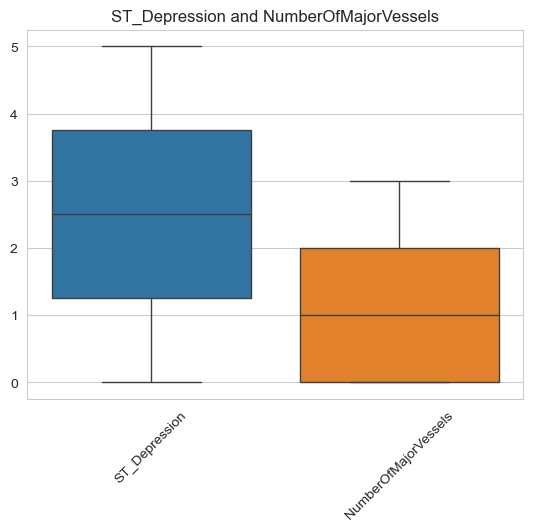

In [69]:
#Plotting ST_Depression and NumberOfMajorVessels for better readablity
sns.boxplot(data=df[["ST_Depression", "NumberOfMajorVessels"]])
plt.xticks(rotation=45)
plt.title("ST_Depression and NumberOfMajorVessels")

In [71]:
df[categorics_cols].dtypes

Gender                   category
Smoker                   category
Diabetes                 category
Hypertension             category
FamilyHistory            category
PhysicalActivity         category
AlcoholConsumption       category
Diet                     category
StressLevel              category
Ethnicity                category
Income                   category
EducationLevel           category
Medication               category
ChestPainType            category
ECGResults               category
ExerciseInducedAngina    category
Slope                    category
Thalassemia              category
PreviousHeartAttack      category
StrokeHistory            category
Residence                category
EmploymentStatus         category
MaritalStatus            category
dtype: object

In [73]:
df["Gender"].value_counts()#Spotting issues(e.g., Meal instade of Male)

#Incase of a typos
df["Gender"].replace({'Meal': 'Male'})

df[(df["Smoker"] == "yes") & (df["Age"] < 10)]
#This checks if a smoker is actually under the age of 10. In that case we would either correct or drop these values

,Age,Gender,Cholesterol,BloodPressure,HeartRate,BMI,Smoker,Diabetes,Hypertension,FamilyHistory,...,ExerciseInducedAngina,Slope,NumberOfMajorVessels,Thalassemia,PreviousHeartAttack,StrokeHistory,Residence,EmploymentStatus,MaritalStatus,Outcome


What I have done in this process of cleaning our dataset
1. Handling Missing Values
2. Remove duplicates (no in our case)
3. Fix data types
4. Detect and treat outliers
5. Check for inconsistencies

## Exploratory Data Analysis (EDA)

In [77]:
df.describe()

,Age,Cholesterol,BloodPressure,HeartRate,BMI,MaxHeartRate,ST_Depression,NumberOfMajorVessels
count,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000,372974.000000
mean,56.975151,199.455844,134.508234,89.495043,29.006733,149.463896,2.501799,1.498525
std,15.867016,57.723381,25.984528,17.342658,6.345460,28.849990,1.443696,1.118003
min,30.000000,100.000000,90.000000,60.000000,18.000000,100.000000,0.000000,0.000000
25%,43.000000,149.000000,112.000000,74.000000,23.500000,124.000000,1.250000,0.000000
50%,57.000000,199.000000,134.000000,89.000000,29.000000,149.000000,2.500000,1.000000
75%,71.000000,249.000000,157.000000,105.000000,34.500000,174.000000,3.750000,2.000000
max,84.000000,299.000000,179.000000,119.000000,40.000000,199.000000,5.000000,3.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372974 entries, 0 to 372973
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Age                    372974 non-null  int64   
 1   Gender                 372974 non-null  category
 2   Cholesterol            372974 non-null  int64   
 3   BloodPressure          372974 non-null  int64   
 4   HeartRate              372974 non-null  int64   
 5   BMI                    372974 non-null  float64 
 6   Smoker                 372974 non-null  category
 7   Diabetes               372974 non-null  category
 8   Hypertension           372974 non-null  category
 9   FamilyHistory          372974 non-null  category
 10  PhysicalActivity       372974 non-null  category
 11  AlcoholConsumption     372974 non-null  category
 12  Diet                   372974 non-null  category
 13  StressLevel            372974 non-null  category
 14  Ethnicity           

In [81]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

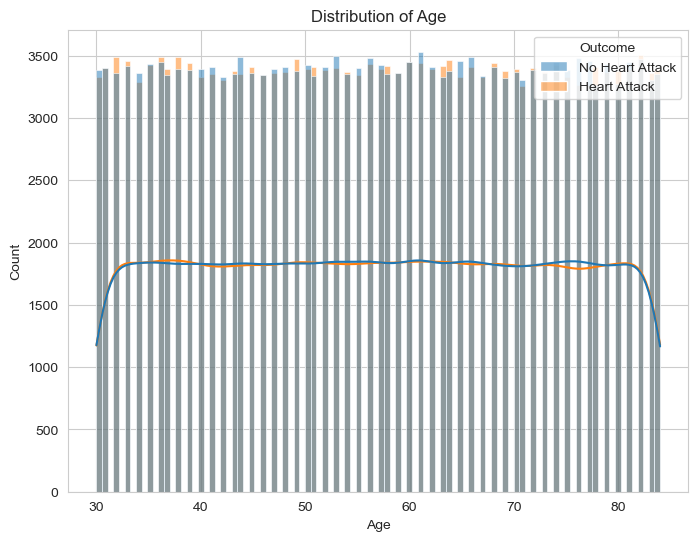

In [85]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Age", hue="Outcome",bins=100, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Boxplot of Cholesterol Levels')

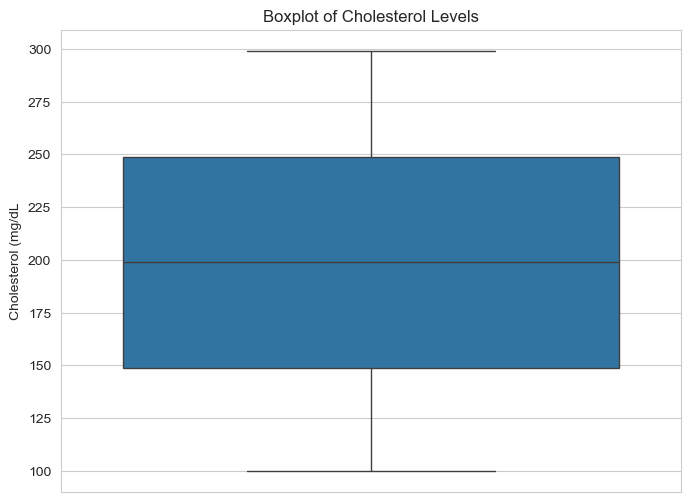

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='Cholesterol')
plt.ylabel("Cholesterol (mg/dL")
plt.title("Boxplot of Cholesterol Levels")

Text(0, 0.5, 'Cholesterol Level (mg/dL)')

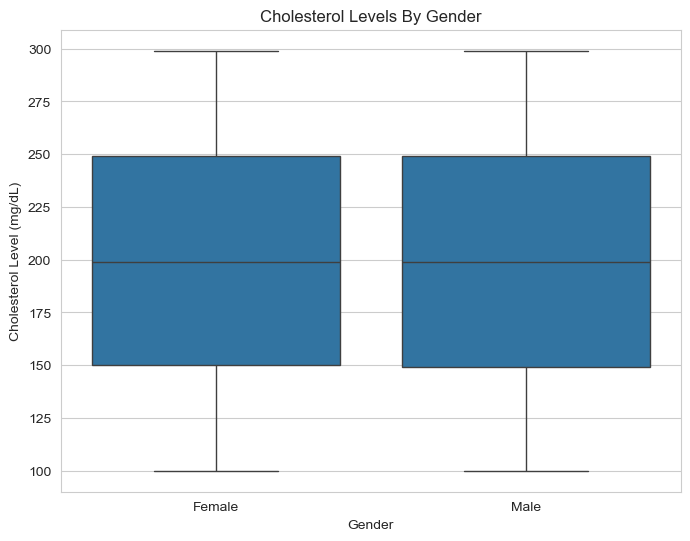

In [89]:
#Comparing cholesterol Levels by gender
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Gender", y="Cholesterol")
plt.title("Cholesterol Levels By Gender")
plt.xlabel("Gender")
plt.ylabel("Cholesterol Level (mg/dL)")

Text(0, 0.5, 'Count')

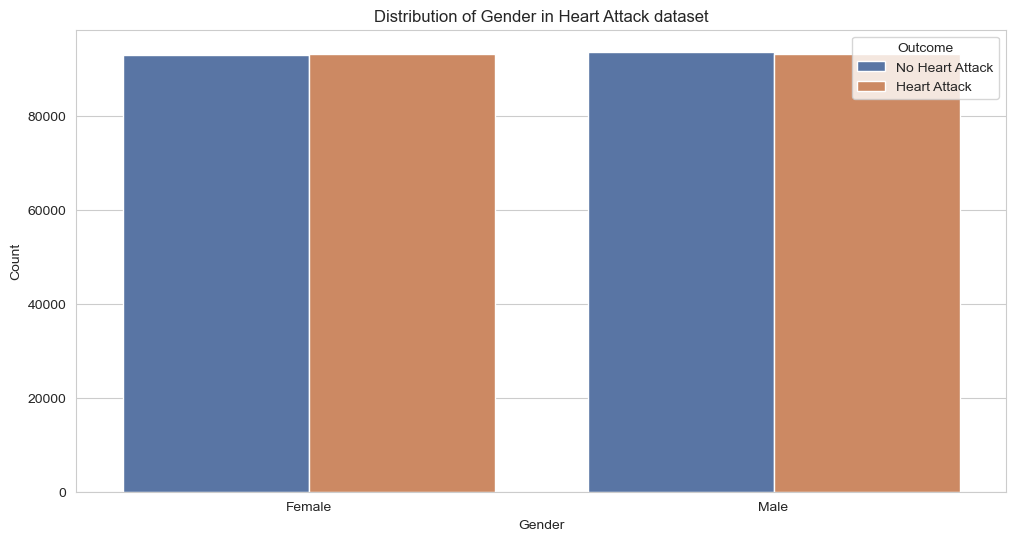

In [91]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Gender", hue="Outcome", palette="deep")
plt.title("Distribution of Gender in Heart Attack dataset")
plt.xlabel("Gender")
plt.ylabel("Count")

In [93]:
df["Gender"].value_counts()

Gender
Male      186770
Female    186204
Name: count, dtype: int64

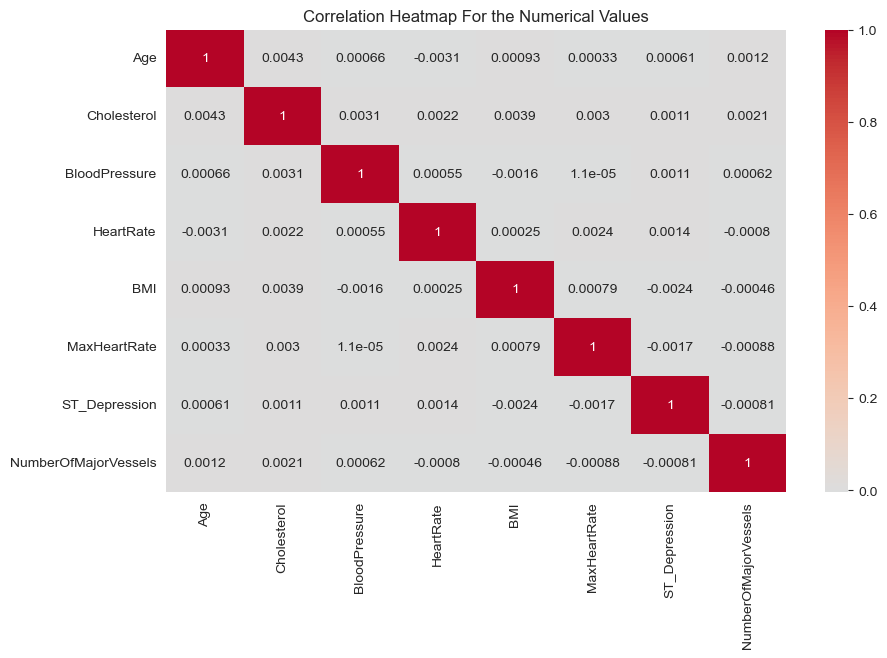

In [95]:
plt.figure(figsize=(10,6))
correlation_matrix = df[numerical_cols].corr()
correlation_matrix.fillna(0, inplace=True)  # Replace NaN with 0
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap For the Numerical Values")

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
warnings.simplefilter(action='ignore', category=FutureWarning)

Text(0.5, 1.0, 'Age Distribution By Gender')

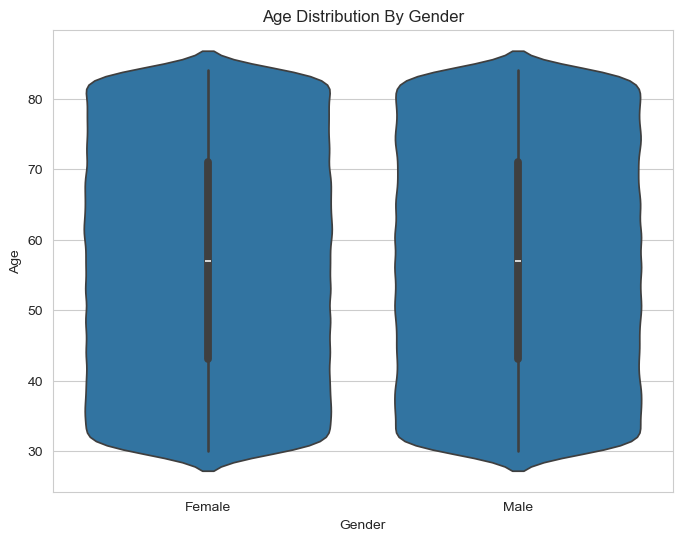

In [97]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df, x="Gender", y="Age")
plt.title("Age Distribution By Gender")

This output suggests that the number of ages for both Genders varies between 30(lower bound) and 80(upper bound)

In [100]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Number of Heart Attack By Age')

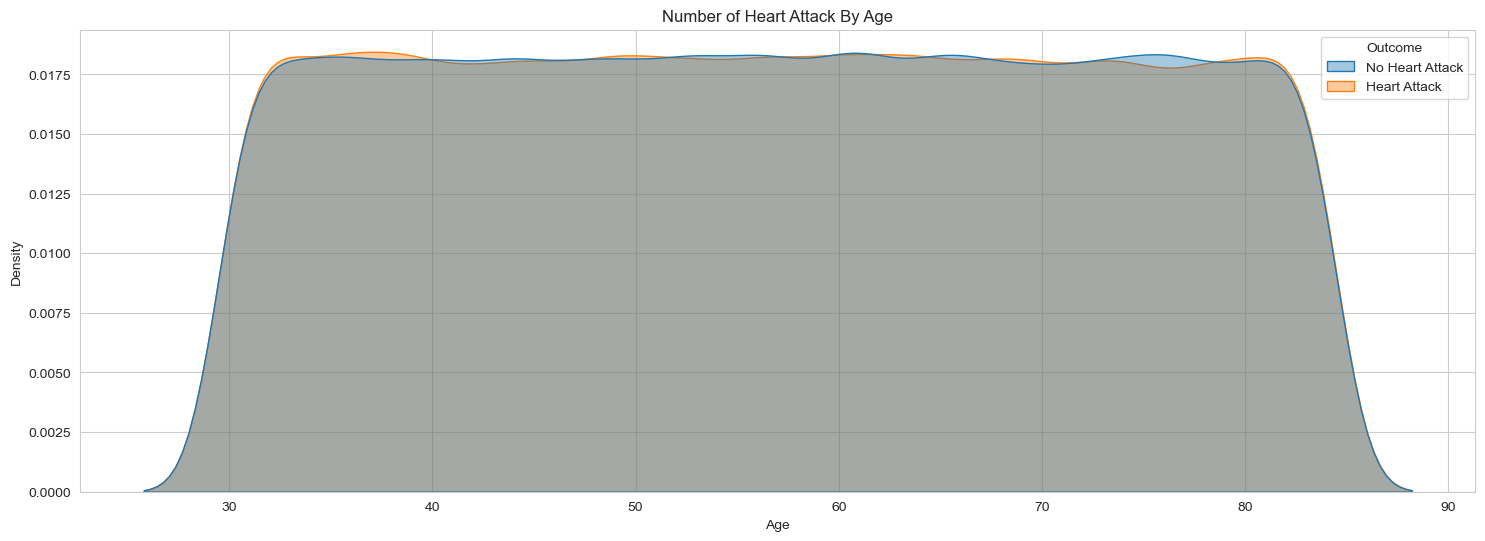

In [102]:
#Which age has the biggest number of heart attack?
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
sns.kdeplot(data=df, x="Age", hue="Outcome", common_norm=False, fill=True, alpha=0.4)
plt.title("Number of Heart Attack By Age")

In [104]:
df_age = df.groupby(["Age", "Outcome"]).size().reset_index(name="Count")
df_age #a count of unique occurrences by age and outcome columns and resets the index

,Age,Outcome,Count
0,30,Heart Attack,3329
1,30,No Heart Attack,3386
2,31,Heart Attack,3398
3,31,No Heart Attack,3400
4,32,Heart Attack,3490
...,...,...,...
105,82,No Heart Attack,3476
106,83,Heart Attack,3362
107,83,No Heart Attack,3308
108,84,Heart Attack,3386


In [106]:
#Calculating percentage for each age group 
df_age["Percentage"] = df_age.groupby("Age")["Count"].apply(lambda x: x / x.sum() * 100).reset_index(drop=True)
df_age

,Age,Outcome,Count,Percentage
0,30,Heart Attack,3329,49.575577
1,30,No Heart Attack,3386,50.424423
2,31,Heart Attack,3398,49.985290
3,31,No Heart Attack,3400,50.014710
4,32,Heart Attack,3490,50.926601
...,...,...,...,...
105,82,No Heart Attack,3476,49.778032
106,83,Heart Attack,3362,50.404798
107,83,No Heart Attack,3308,49.595202
108,84,Heart Attack,3386,50.244843


Text(0.5, 1.0, 'Percentage of Heart Attacks by Age')

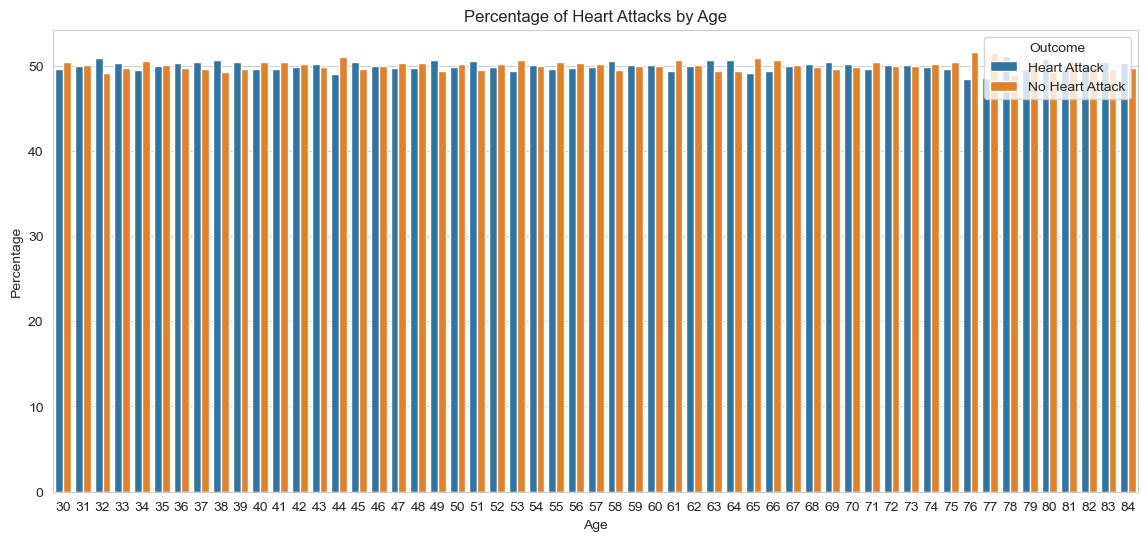

In [108]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=df_age,
    x="Age",
    y="Percentage",
    hue="Outcome"
)
plt.title("Percentage of Heart Attacks by Age")

The number of cases appears to be in a uniform distribution across all ages. The number of cases of Heart-Attack and No-Heart-Attack are similler and almost exactly 50% divided

In [111]:
df["Smoker"].value_counts()

Smoker
0    186776
1    186198
Name: count, dtype: int64